In [3]:
import pandas as pd 
import numpy as np

## Handling mixed Values

In [4]:
df = pd.read_csv("Dataset/titanic.csv")
df.sample(5)

,Cabin,Ticket,number,Survived
399,NaN,240929,1,1
153,NaN,A/5. 851,4,0
216,NaN,STON/O2. 3101283,4,1
97,D10 D12,PC 17759,3,1
75,F G73,348123,1,0


In [5]:
df['number'].value_counts()

number
A    139
6    131
1    129
2    126
4    126
5    123
3    117
Name: count, dtype: int64

In [6]:
df['number_numerical'] = pd.to_numeric(df['number'] , errors="coerce" , downcast= "integer")
df['number_catrgorical'] = np.where(df['number_numerical'].isnull() , df['number'] , np.nan)

In [7]:
df.sample(5)

,Cabin,Ticket,number,Survived,number_numerical,number_catrgorical
487,B37,11771,2,0,2.0,NaN
513,NaN,PC 17603,2,1,2.0,NaN
631,NaN,347743,4,0,4.0,NaN
691,NaN,349256,3,1,3.0,NaN
751,E121,392096,5,1,5.0,NaN


In [8]:
df['cabin_num']  = df['Cabin'].str.extract("(\d+)")
df['cabin_cat'] = df['Cabin'].str[0]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\singh\AppData\Local\Temp\ipykernel_13792\2398669772.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num']  = df['Cabin'].str.extract("(\d+)")


In [9]:
df.sample(10)

,Cabin,Ticket,number,Survived,number_numerical,number_catrgorical,cabin_num,cabin_cat
118,B58 B60,PC 17558,3,0,3.0,NaN,58,B
554,NaN,347085,3,1,3.0,NaN,NaN,NaN
11,C103,113783,1,1,1.0,NaN,103,C
854,NaN,244252,2,0,2.0,NaN,NaN,NaN
457,D21,17464,1,1,1.0,NaN,21,D
321,NaN,349219,6,0,6.0,NaN,NaN,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN
51,NaN,A/4. 39886,A,0,NaN,A,NaN,NaN
672,NaN,C.A. 24580,3,0,3.0,NaN,NaN,NaN
723,NaN,250643,1,0,1.0,NaN,NaN,NaN


In [10]:
df['cabin_cat'].value_counts()

cabin_cat
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [11]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [12]:
# tickes
df['tick_num'] = pd.to_numeric(df['Ticket'] , errors="coerce" , downcast="integer")
df['tick_cat'] = df['Ticket'].apply(lambda x : x.split(" ")[0])
df['tick_cat'] = np.where(df['tick_cat'].str.isdigit() , np.nan , df['tick_cat'])

In [13]:
df.sample(10)

,Cabin,Ticket,number,Survived,number_numerical,number_catrgorical,cabin_num,cabin_cat,tick_num,tick_cat
229,NaN,4133,3,0,3.0,NaN,NaN,NaN,4133.0,NaN
638,NaN,3101295,6,0,6.0,NaN,NaN,NaN,3101295.0,NaN
469,NaN,2666,4,1,4.0,NaN,NaN,NaN,2666.0,NaN
268,C125,PC 17582,3,1,3.0,NaN,125,C,NaN,PC
752,NaN,345780,3,0,3.0,NaN,NaN,NaN,345780.0,NaN
352,NaN,2695,5,0,5.0,NaN,NaN,NaN,2695.0,NaN
613,NaN,370377,3,0,3.0,NaN,NaN,NaN,370377.0,NaN
65,NaN,2661,2,1,2.0,NaN,NaN,NaN,2661.0,NaN
586,NaN,237565,2,0,2.0,NaN,NaN,NaN,237565.0,NaN
621,D19,11753,2,1,2.0,NaN,19,D,11753.0,NaN


## Working with Dates and time

In [14]:
import warnings 
warnings.filterwarnings("ignore")

date = pd.read_csv("Dataset\orders.csv")
time = pd.read_csv("Dataset\messages.csv")

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\singh\AppData\Local\Temp\ipykernel_13792\1942022199.py:4: SyntaxWarning: invalid escape sequence '\o'
  date = pd.read_csv("Dataset\orders.csv")
C:\Users\singh\AppData\Local\Temp\ipykernel_13792\1942022199.py:5: SyntaxWarning: invalid escape sequence '\m'
  time = pd.read_csv("Dataset\messages.csv")


In [15]:
date['date'] = pd.to_datetime(date['date'])

In [16]:
date['year'] = date['date'].dt.year
date['month'] = date['date'].dt.month
date['day'] = date['date'].dt.day
date['month_name'] = date['date'].dt.month_name()
date['day_of_week'] = date['date'].dt.day_of_week
date['day_name'] = date['date'].dt.day_name()
date['quater'] = date['date'].dt.quarter

In [17]:
# is weekend
date['is_weekend'] = np.where(date['day_name'].isin(["Sunday" , "Saturday"])  , 1 , 0)

In [18]:
date.sample(10)

,date,product_id,city_id,orders,year,month,day,month_name,day_of_week,day_name,quater,is_weekend
525,2019-06-13,2249,20,2,2019,6,13,June,3,Thursday,2,0
884,2019-04-03,5314,11,7,2019,4,3,April,2,Wednesday,2,0
717,2019-07-24,1584,0,3,2019,7,24,July,2,Wednesday,3,0
665,2018-09-29,146,16,5,2018,9,29,September,5,Saturday,3,1
938,2019-06-21,4587,9,22,2019,6,21,June,4,Friday,2,0
922,2019-03-28,1658,16,27,2019,3,28,March,3,Thursday,1,0
531,2019-07-31,4639,0,5,2019,7,31,July,2,Wednesday,3,0
345,2018-07-26,6857,18,61,2018,7,26,July,3,Thursday,3,0
461,2019-10-20,5125,3,3,2019,10,20,October,6,Sunday,4,1
558,2019-06-26,2416,26,2,2019,6,26,June,2,Wednesday,2,0


In [19]:
# Find Time duration betwwen two dates 
import datetime

today = datetime.datetime.now()
today

datetime.datetime(2025, 3, 24, 10, 30, 31, 518443)

In [32]:
# one day - all days
(today - date["date"])

# how many dates
(today - date["date"]).dt.days

# How many months
np.round((today - date["date"]) / np.timedelta64(1 , 'm') , 0 )

0      2781271.0
1      3475351.0
2      3375991.0
3      2946871.0
4      3267991.0
         ...    
995    3397591.0
996    3312631.0
997    3093751.0
998    3187351.0
999    2861911.0
Name: date, Length: 1000, dtype: float64

In [36]:
# Time Dicuss
time['date'] = pd.to_datetime(time['date'])

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [38]:
time.head(5)

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [41]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

### Removing NUll Values

In [ ]:
# 1) remove them 
# 2) impute : a) univarient b) multivarient

In [ ]:
# Compelete case analysis / lisr wise deletion
# remove row if columns is null
# Assumption :
# 1) data is missing completely at random (MCAR)

# Why
# 1) Easy
# 2) preseeve distribution if MCAR

# WHY Not
# 1) if large data is missing
# 2) at deployment model have no idea how to handle missing data

# When to use this
# MCAR
# upto 5% data is missing


In [43]:
df = pd.read_csv("Dataset\data_science_job.csv")
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
11203,29806,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,10000+,NaN,36.0,0.0
17431,8526,city_74,0.579,NaN,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Early Stage Startup,43.0,0.0
13712,4741,city_104,0.924,NaN,Has relevent experience,Full time course,High School,NaN,5.0,<10,Early Stage Startup,NaN,0.0
10389,11487,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,<10,Pvt Ltd,262.0,0.0
14476,8854,city_19,0.682,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,NaN,NaN,NaN,0.0


In [44]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [46]:
# where missing data is more than 5%
col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0.00]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [48]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9244,0.887,Full time course,Graduate,3.0,25.0
16364,0.920,no_enrollment,Masters,16.0,42.0
7561,NaN,no_enrollment,Graduate,20.0,56.0
13172,0.624,no_enrollment,Graduate,10.0,80.0
5264,0.920,no_enrollment,Graduate,4.0,NaN


In [49]:
len(df[col].dropna()) / len(df)

0.8968577095730244

In [50]:
# remove in a seperate df
drop_cca_df = df[col].dropna()
drop_cca_df.shape , df.shape

((17182, 5), (19158, 13))

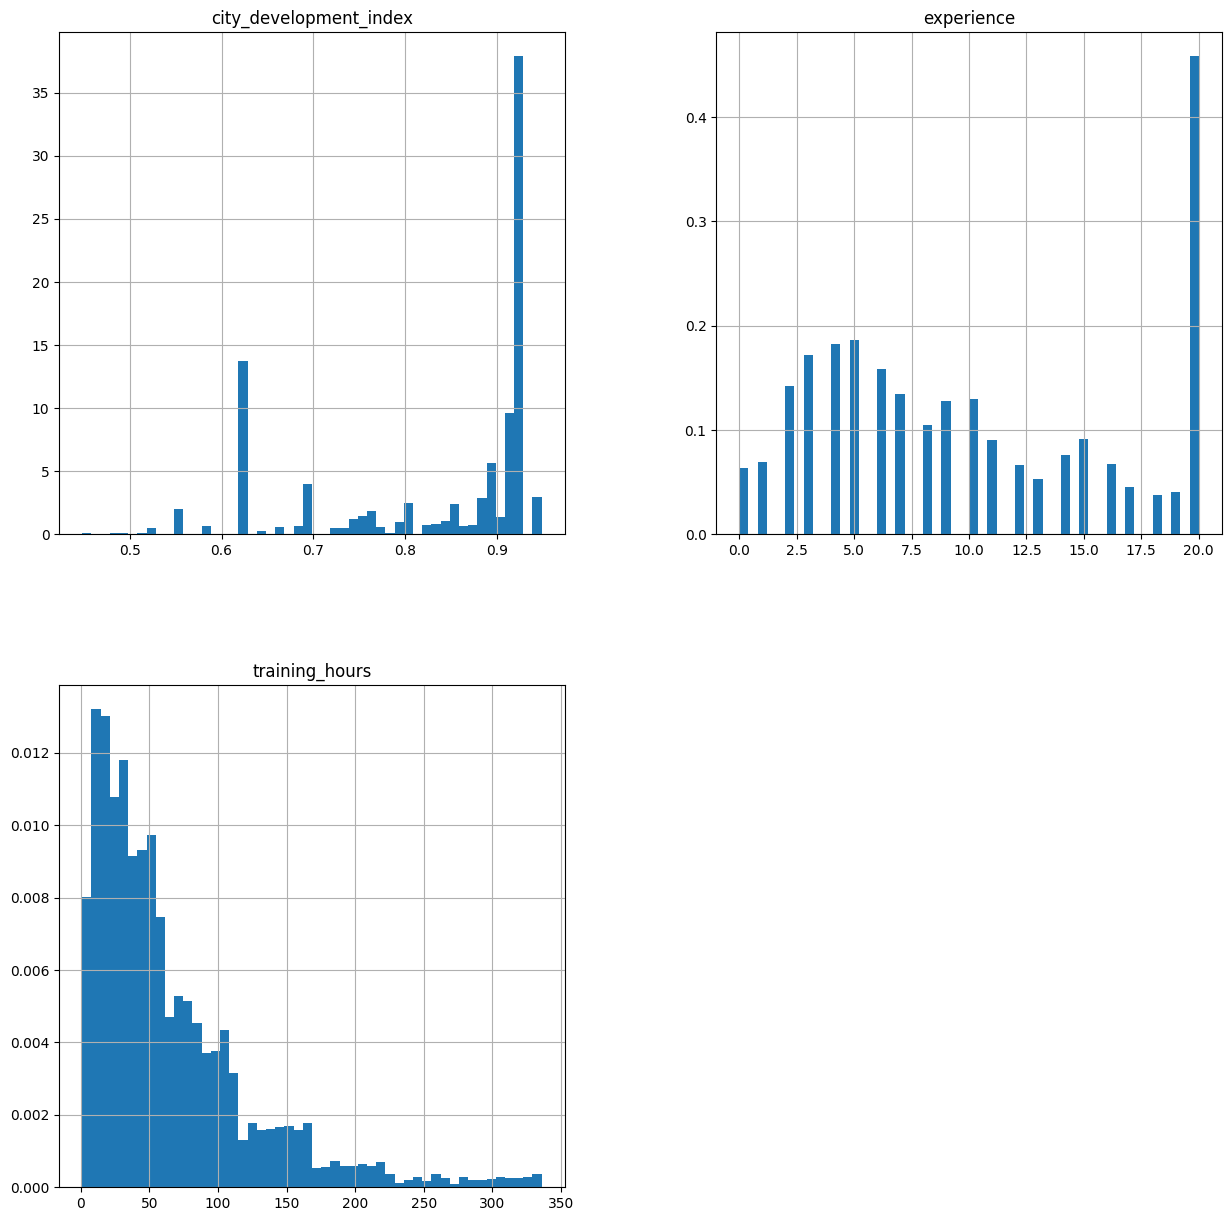

In [54]:
import matplotlib.pyplot as plt
drop_cca_df.hist(bins= 50 , density = True , figsize=(15 , 15))
plt.show()

<Axes: >

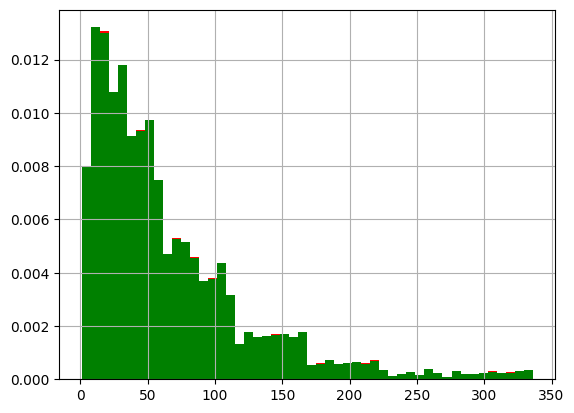

In [ ]:
# If numerical data, always Draw a histogram

# original data
df["training_hours"].hist(bins = 50, density = True , color = "red")

# After removing the data
drop_cca_df["training_hours"].hist(bins = 50, density = True , color = "green")

<Axes: >

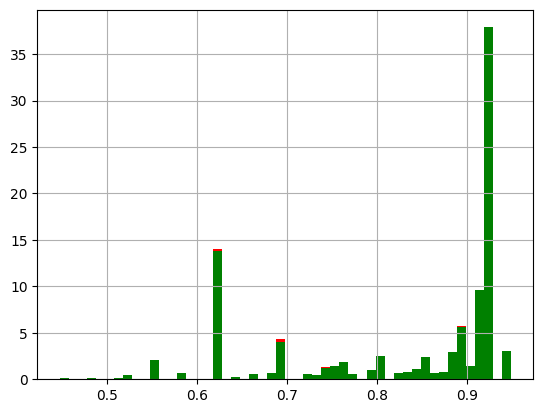

In [60]:
# Another one

# original data
df["city_development_index"].hist(bins = 50, density = True , color = "red")

# After removing the data
drop_cca_df["city_development_index"].hist(bins = 50, density = True , color = "green")

<Axes: >

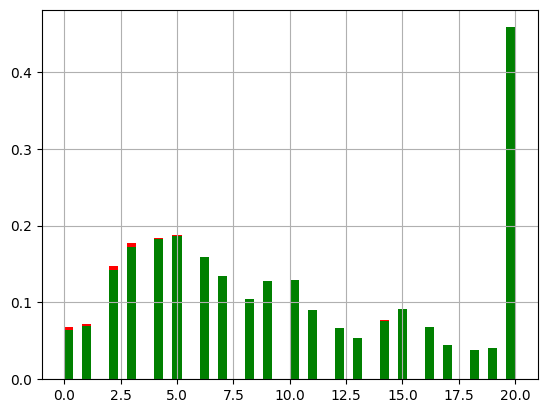

In [63]:
# Another one

# original data
df["experience"].hist(bins = 50, density = True , color = "red")

# After removing the data
drop_cca_df["experience"].hist(bins = 50, density = True , color = "green")

<Axes: ylabel='Density'>

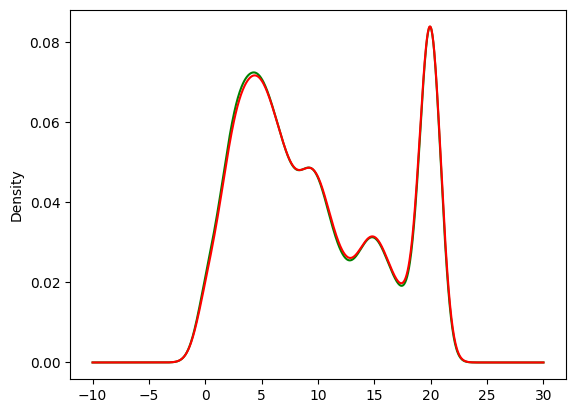

In [67]:
# Same for experinece column

# original data
df['experience'].plot(kind= "density" , color = "green")

# After perfomrming cca
drop_cca_df['experience'].plot(kind= "density" , color = "red")

#### For Categorical columns : Ratio of columns should be maintained

In [ ]:
df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [74]:
df["education_level"].value_counts()
df['education_level'].value_counts() / len(df)

education_level
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: count, dtype: float64

In [76]:
temp = pd.concat([
    
    # Oroginal data
    df['enrolled_university'].value_counts() / len(df),
    
    # data after CCA
    drop_cca_df['enrolled_university'].value_counts() / len(drop_cca_df)
] , axis= 1)

temp.columns = ["original" , "cca"]
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
# Check for Education
temp = pd.concat([
    
    # Oroginal data
    df['education_level'].value_counts() / len(df),
    
    # data after CCA
    drop_cca_df['education_level'].value_counts() / len(drop_cca_df)
] , axis= 1)

temp.columns = ["original" , "cca"]
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
